# Can AI preserve our science legacy

In [1]:
import nltk
import pandas as pd
import gensim.corpora 
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import string 
import gensim
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string , preprocess_documents
from gensim.utils import lemmatize

In [2]:
import requests
import json

In [3]:
api_root = 'https://ntrs.nasa.gov'

In [4]:
def getDocsLinks(count = 100):
  offset = 0
  url = api_root + f'/api/citations/search?center=CDMS&page.size=100&offset={offset}'

  download_urls = []
  while len(download_urls) < count:
     resp = requests.get(url).json()
     #print(resp['results'][-1]['downloads'][0]['links']['fulltext'])
     downloadable_files = [ ( i['id'] ,i['downloads'][0]['links']['fulltext'] )
                          for i in resp['results'] 
                          if len(i['downloads']) > 0]
     download_urls.extend(downloadable_files)
     offset += 100
     return download_urls[:count]


In [5]:
def getDocsLinkByID(id):

 


   download_url = None
   download_url = requests.get(api_root + f'/api/citations/{id}/downloads/{id}.txt')


   return download_url


In [6]:
docs = getDocsLinks(count = 5)

In [7]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
texts = [ (i[0], requests.get(api_root + i[1]).content, ) for i in docs ]

In [9]:
import re
import string
import glob

from gensim import utils
from gensim.parsing.porter import PorterStemmer


# improved list from Stone, Denis, Kwantes (2010)
STOPWORDS = """
a about above across after afterwards again against all almost alone along already also although always am among amongst amoungst amount an and another any anyhow anyone anything anyway anywhere are around as at back be
became because become becomes becoming been before beforehand behind being below beside besides between beyond bill both bottom but by call can
cannot cant co computer con could couldnt cry de describe
detail did didn do does doesn doing don done down due during
each eg eight either eleven else elsewhere empty enough etc even ever every everyone everything everywhere except few fifteen
fify fill find fire first five for former formerly forty found four from front full further get give go
had has hasnt have he hence her here hereafter hereby herein hereupon hers herself him himself his how however hundred i ie
if in inc indeed interest into is it its itself keep last latter latterly least less ltd
just
kg km
made make many may me meanwhile might mill mine more moreover most mostly move much must my myself name namely
neither never nevertheless next nine no nobody none noone nor not nothing now nowhere of off
often on once one only onto or other others otherwise our ours ourselves out over own part per
perhaps please put rather re
quite
rather really regarding
same say see seem seemed seeming seems serious several she should show side since sincere six sixty so some somehow someone something sometime sometimes somewhere still such system take ten
than that the their them themselves then thence there thereafter thereby therefore therein thereupon these they thick thin third this those though three through throughout thru thus to together too top toward towards twelve twenty two un under
until up unless upon us used using
various very very via
was we well were what whatever when whence whenever where whereafter whereas whereby wherein whereupon wherever whether which while whither who whoever whole whom whose why will with within without would yet you
your yours yourself yourselves

second minute time figure equation test inches centimetres celsius fahrenheit function kilograms pounds lbs section iii part object tests
nasa sec fig min max maximum minimum use data unit measure symbol input material materials 
"""
STOPWORDS = frozenset(w for w in STOPWORDS.split() if w)

def remove_stopwords(s):
    s = utils.to_unicode(s)
    return " ".join(w for w in s.split() if w not in STOPWORDS)
RE_PUNCT = re.compile('([%s])+' % re.escape(string.punctuation), re.UNICODE)
def strip_punctuation(s):
    s = utils.to_unicode(s)
    return RE_PUNCT.sub(" ", s)

strip_punctuation2 = strip_punctuation

RE_TAGS = re.compile(r"<([^>]+)>", re.UNICODE)
def strip_tags(s):
    s = utils.to_unicode(s)
    return RE_TAGS.sub("",s)



def strip_short(s, minsize=3):
    s = utils.to_unicode(s)
    return " ".join(e for e in s.split() if len(e) >= minsize)



RE_NUMERIC = re.compile(r"[0-9]+", re.UNICODE)
def strip_numeric(s):
    s = utils.to_unicode(s)
    return RE_NUMERIC.sub("", s)



RE_NONALPHA = re.compile(r"\W", re.UNICODE)
def strip_non_alphanum(s):
    s = utils.to_unicode(s)
    return RE_NONALPHA.sub(" ", s)



RE_WHITESPACE = re.compile(r"(\s)+", re.UNICODE)
def strip_multiple_whitespaces(s):
    s = utils.to_unicode(s)
    return RE_WHITESPACE.sub(" ", s)

RE_AL_NUM = re.compile(r"([a-z]+)([0-9]+)", flags=re.UNICODE)
RE_NUM_AL = re.compile(r"([0-9]+)([a-z]+)", flags=re.UNICODE)
def split_alphanum(s):
    s = utils.to_unicode(s)
    s = RE_AL_NUM.sub(r"\1 \2", s)
    return RE_NUM_AL.sub(r"\1 \2", s)



def stem_text(text):
    """
    Return lowercase and (porter-)stemmed version of string `text`.
    """
    text = utils.to_unicode(text)
    p = PorterStemmer()
    return ' '.join(p.stem(word) for word in text.split())

stem = stem_text

DEFAULT_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation, strip_multiple_whitespaces,
                   strip_numeric, remove_stopwords, strip_short]


def preprocess_string(s, filters=DEFAULT_FILTERS):
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s.split()


In [10]:
def preprocessing(count):
 docs = getDocsLinks(count)
 #requests.get(api_root + 'api/citations/{id}/downloads/{id}.txt')
 texts = [ (i[0], requests.get(api_root + i[1]).content, ) for i in docs ]
 dataSet = list()
 for text in texts:
   text = str(text[1])
   dataSet.append(preprocess_string(text.replace('\\n', ' ').replace('-',' ')))

 lemmatizer = WordNetLemmatizer()

 for doc in dataSet:
   doc = [lemmatizer.lemmatize(word) for word in doc]  

 

 return dataSet  

In [11]:
def testingPreprocessing(id):
  doc = getDocsLinkByID(id)
  doc = str(doc.content)
  data = list()
  data.append(preprocess_string(doc.replace('\\n', ' ').replace('-',' ')))

  lemmatizer = WordNetLemmatizer()
  for doc in data:
   doc = [lemmatizer.lemmatize(word) for word in doc]  
  return data

In [12]:
def doc2Bow(dataSet):
  dictionary = gensim.corpora.Dictionary(dataSet)
  bow_corpus = [dictionary.doc2bow(doc) for doc in dataSet]

  return bow_corpus , dictionary

In [13]:
dataSet = preprocessing(100000)
bow_corpus , dictionary = doc2Bow(dataSet)

In [14]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 20, 
                                   id2word = dictionary,
                                   passes=10                             
                                   )

In [15]:
lda_model.print_topics()

[(0,
  '0.000*"design" + 0.000*"shell" + 0.000*"valve" + 0.000*"tank" + 0.000*"program" + 0.000*"radiation" + 0.000*"oxidizer" + 0.000*"exposure" + 0.000*"xbf" + 0.000*"mcr"'),
 (1,
  '0.000*"beam" + 0.000*"design" + 0.000*"shell" + 0.000*"program" + 0.000*"radiation" + 0.000*"equations" + 0.000*"table" + 0.000*"motion" + 0.000*"valve" + 0.000*"velocity"'),
 (2,
  '0.000*"shell" + 0.000*"resistance" + 0.000*"radiation" + 0.000*"fluid" + 0.000*"velocity" + 0.000*"acoustic" + 0.000*"surface" + 0.000*"terms" + 0.000*"condition" + 0.000*"solution"'),
 (3,
  '0.000*"plane" + 0.000*"streamwise" + 0.000*"keel" + 0.000*"center" + 0.000*"motion" + 0.000*"experiment" + 0.000*"field" + 0.000*"shell" + 0.000*"parawing" + 0.000*"beam"'),
 (4,
  '0.012*"design" + 0.009*"program" + 0.008*"valve" + 0.008*"tank" + 0.008*"oxidizer" + 0.007*"mcr" + 0.007*"component" + 0.007*"performance" + 0.006*"xbf" + 0.006*"exposure"'),
 (5,
  '0.017*"radiance" + 0.017*"plane" + 0.016*"aperture" + 0.013*"sampling" + 0

####Top Keywords for first 9 topics

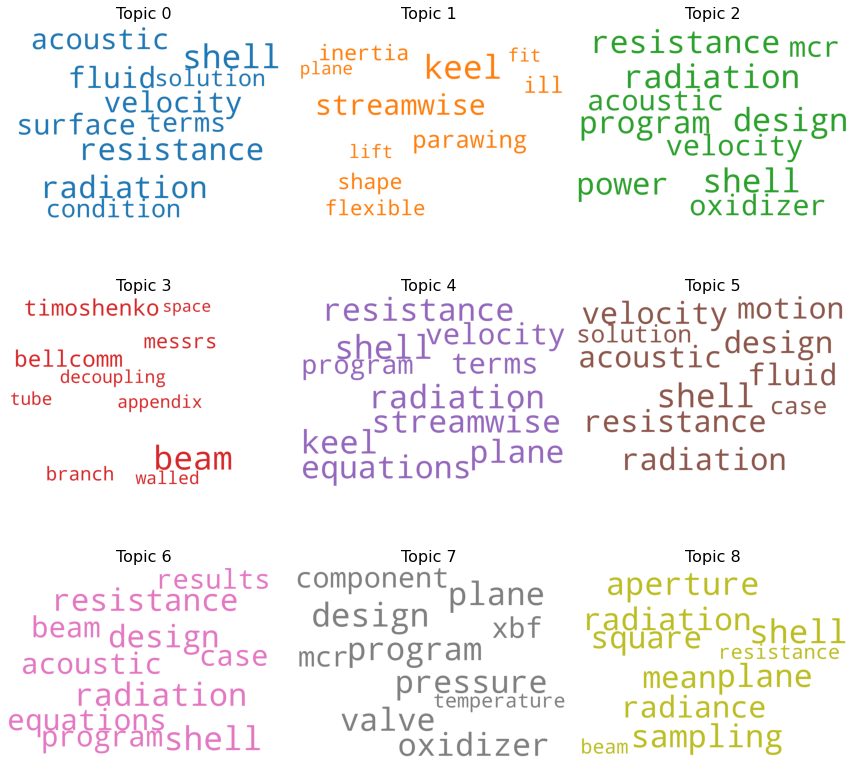

In [16]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3,3, figsize=(12,12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

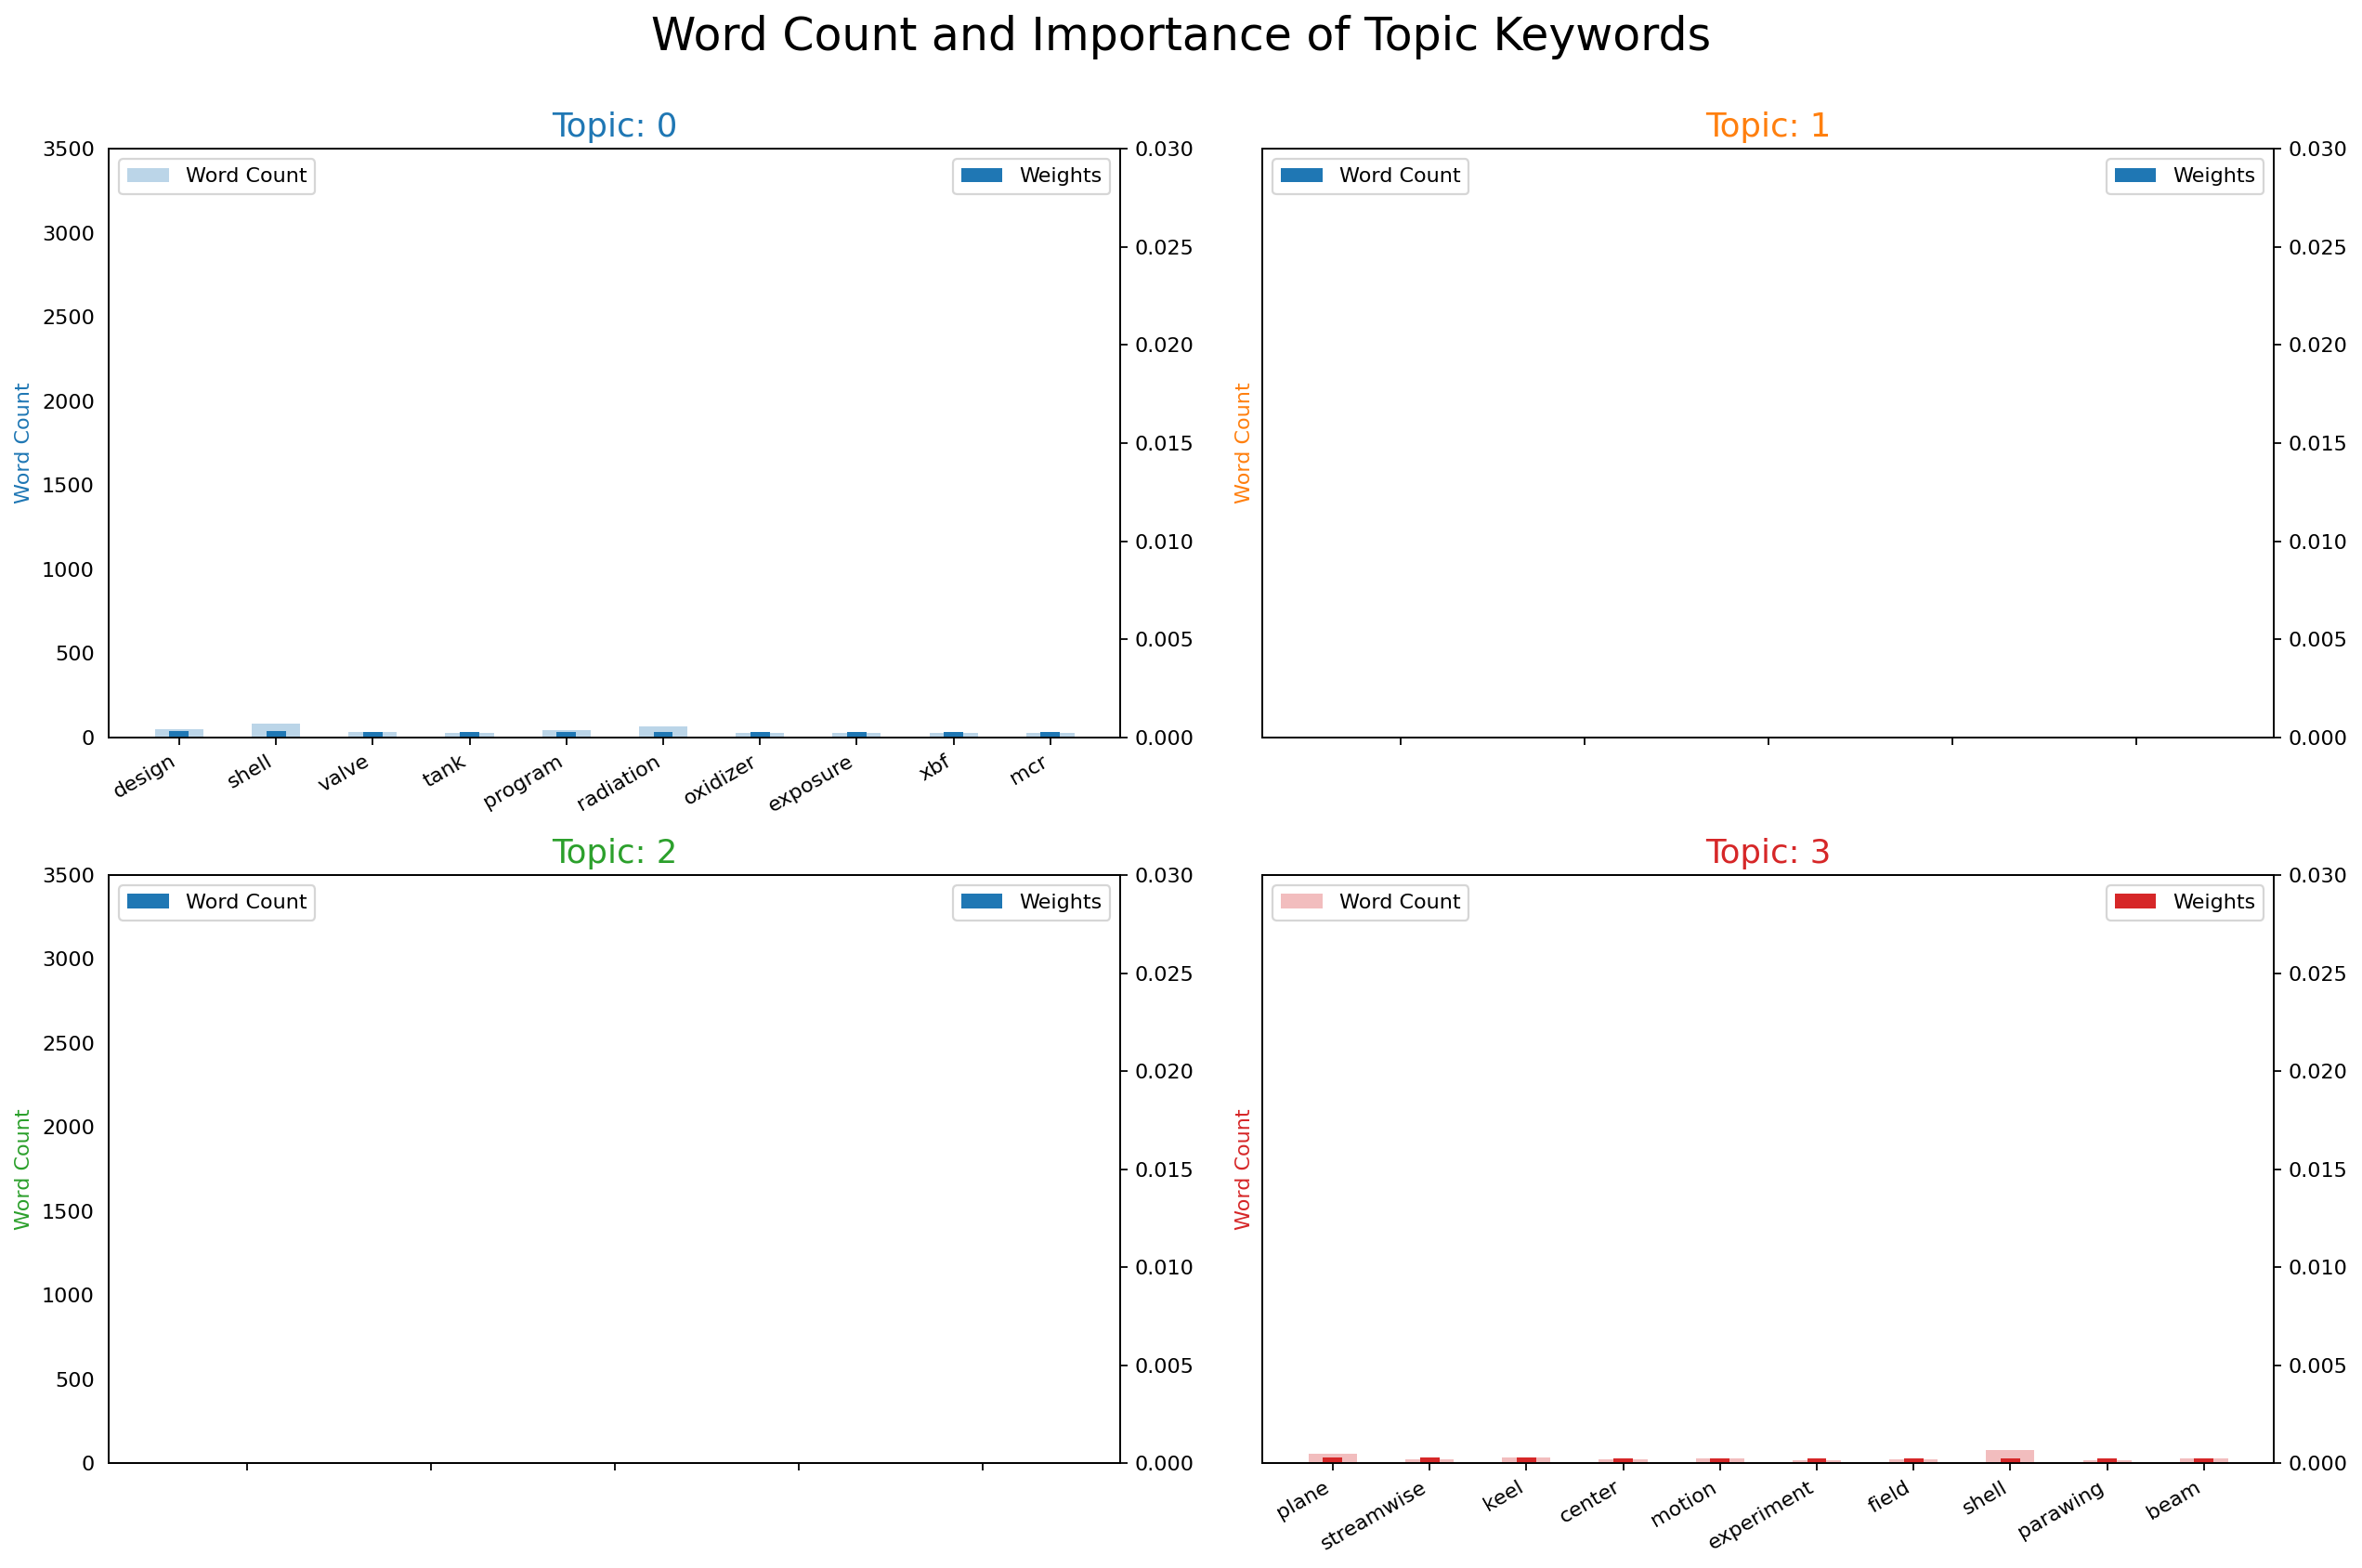

In [17]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in dataSet for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [18]:
testData = testingPreprocessing(19900018794)
test_bow_corpus , test_dictionary = doc2Bow(testData)

for index  in sorted(lda_model[test_bow_corpus]):
  print(lda_model.print_topic(index[0][0]))

0.017*"radiance" + 0.017*"plane" + 0.016*"aperture" + 0.013*"sampling" + 0.009*"square" + 0.009*"mean" + 0.009*"elements" + 0.008*"functions" + 0.008*"points" + 0.007*"optical"


In [19]:
import pickle

In [20]:
filename = 'finalized_keyWords_model.sav'
pickle.dump(lda_model, open(filename, 'wb'))

In [21]:
l = pickle.load(open(filename, 'rb'))
l.print_topics()

[(0,
  '0.000*"design" + 0.000*"shell" + 0.000*"valve" + 0.000*"tank" + 0.000*"program" + 0.000*"radiation" + 0.000*"oxidizer" + 0.000*"exposure" + 0.000*"xbf" + 0.000*"mcr"'),
 (1,
  '0.000*"beam" + 0.000*"design" + 0.000*"shell" + 0.000*"program" + 0.000*"radiation" + 0.000*"equations" + 0.000*"table" + 0.000*"motion" + 0.000*"valve" + 0.000*"velocity"'),
 (2,
  '0.000*"shell" + 0.000*"resistance" + 0.000*"radiation" + 0.000*"fluid" + 0.000*"velocity" + 0.000*"acoustic" + 0.000*"surface" + 0.000*"terms" + 0.000*"condition" + 0.000*"solution"'),
 (3,
  '0.000*"plane" + 0.000*"streamwise" + 0.000*"keel" + 0.000*"center" + 0.000*"motion" + 0.000*"experiment" + 0.000*"field" + 0.000*"shell" + 0.000*"parawing" + 0.000*"beam"'),
 (4,
  '0.012*"design" + 0.009*"program" + 0.008*"valve" + 0.008*"tank" + 0.008*"oxidizer" + 0.007*"mcr" + 0.007*"component" + 0.007*"performance" + 0.006*"xbf" + 0.006*"exposure"'),
 (5,
  '0.017*"radiance" + 0.017*"plane" + 0.016*"aperture" + 0.013*"sampling" + 0